# 中心極限定理の確認

中心極限定理とは，ある母集団(正規分布でなくてもよい)から，N個サンプルを抽出することを考える．
この時，Nが大きくなるにつれて，標本平均の分布は正規分布に従うという定理である．

例えば，サイコロを10回振って出た目の平均を記録することを繰り返そう．

この時，平均を記録する回数を増やすにつれて，正規分布に近づいていく．

## 中心極限定理の検証1
平均1，分散1となる指数分布を考えよう．この分布にしたがって10個のサンプルを抽出し，その平均を記録することを20000回繰り返す．

中心極限定理に従うのならば，この平均の分布は正規分布に従うはずである．

平均分散がともに1の指数分布の平均だから，平均は1，分散0.1となるはずである．



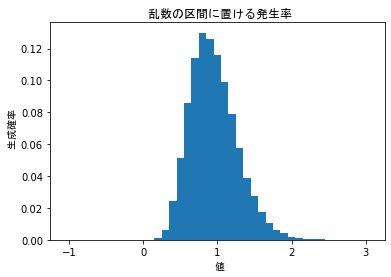

1.0001898095161639
0.0993086214144844


In [26]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
def exponential(lam):
    unif_random = random.uniform(0,1)
    sisuu_random = -(1/lam)*math.log((1-unif_random))
    return sisuu_random

x=np.array([])
y=np.array([])
num=np.array([])
N=20000
for j in range(N):
    S=0
    for i in range(10):
        exponential_random = exponential(1)
        S += exponential_random
    S=S/10  #N(1,1)に従うはず
    x = np.append(x,[S])

DIF=0.1
k=-1
y_2=np.array([])
y=np.append(y,[k])
y_2=np.append(y_2,[(np.count_nonzero((x<k+DIF)))/N])
k+=DIF
UPMAX = 3
while(k<=UPMAX):
    y=np.append(y,[k])
    y_2=np.append(y_2,[(np.count_nonzero((k<=x)&(x<k+DIF)))/N])# ある範囲の標本値の個数の個数の数え上げ
    k+=DIF
y=np.append(y,[UPMAX])
y_2=np.append(y_2,[np.count_nonzero((UPMAX<=x))/N])
plt.bar(y,y_2,width=DIF)
plt.title(" 乱数の区間に置ける発生率",fontname="MS Gothic")
plt.xlabel(" 値",fontname="MS Gothic")
plt.ylabel(" 生成確率",fontname="MS Gothic")
plt.savefig("test7.png",format="png",dpi=300)
plt.show()

print(x.mean())
print(x.var())


## 中心極限定理の検証2
一様分布12個の平均を考えよう．同様に，平均の期待値は6,分散は12となるはずである．

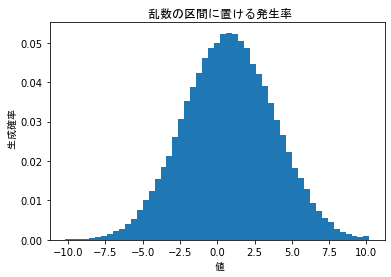

In [27]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
x=np.array([])
y=np.array([])
num=np.array([])
N=200000
for j in range(N):
    S=0
    for i in range(12):
        u=random.uniform(0,1)# 一様分布に従う乱数生成
        S+=u
    f=3*S-17# N(1 ,9 )に従う乱数となる．
    x=np.append(x,[f])

DIF=0.4
k=-10
y_2=np.array([])
y=np.append(y,[k])
y_2=np.append(y_2,[(np.count_nonzero((x<k+DIF)))/N])
k+=DIF
UPMAX = 10
while(k<=UPMAX):
    y=np.append(y,[k])
    y_2=np.append(y_2,[(np.count_nonzero((k<=x)&(x<k+DIF)))/N])# ある範囲の標本値の個数の個数の数え上げ
    k+=DIF
y=np.append(y,[UPMAX])
y_2=np.append(y_2,[np.count_nonzero((UPMAX<=x))/N])
plt.bar(y,y_2,width=0.4)
plt.title(" 乱数の区間に置ける発生率",fontname="MS Gothic")
plt.xlabel(" 値",fontname="MS Gothic")
plt.ylabel(" 生成確率",fontname="MS Gothic")
plt.savefig("test7.png",format="png",dpi=300)
plt.show()

print(x.mean())
print(x.var())

